Homework 2
MA 506 Probability and Statistical Inference: Fall 2023
Due: October 17 (Tuesday), 11:59pm
100 points
Question 1: Exploratory Data Analysis(30 points)
For this problem we will be using the wine dataset. The dataset is available di-
rectly from sklearn (load wine()). Here, just consider the 13 attributes (ignoring
the class). The idea is to predict the Alcohol value using other 12 attributes. So,
in essence you have 12 features and 1 target. For this dataset, do the following:
1. (5 points) Visualize the dataset as a pandas dataframe with proper column
names. Here:
• First 12 columns should represent the 12 features
• 13th column should be the alcohol value
2. (5 points) Plot scatterplots of alcohol value vs each of the features. Since
there are 12 features, plot the 12 scatterplots in a grid of 3 × 4.
3. (5 points) Looking at the scatterplots above, which feature do you think
will be most useful in predicting the alcohol value ? Which feature will be
least helpful ? Explain.
4. (15 points) In your opinion, what information, the following observations
will give regarding the alcohol content (increase or decrease). You can use
any method of your choice to make this decision. Make sure to explain
your reasoning
• Increased value of Color intensity
• Reduced value of Proline
• Increased Magnesium but reduced Ash value

Question 2: Regression (70 points)
Now, just considering the feature ‘proline’ to predict the alcohol value
1
1. (10 points) Fit a straight line: alcohol = β0 + β1proline. Plot this line
over the scattered data. Compute the R2 metric for this model. Please
note that R2 quantifies the quality of a regression model and is defined as
R2 = 1 − Residual sum of squares
T otal sum of squares = 1 −
Pn
i=1(yi − ˆyi)2
Pn
i=1(yi −  ̄y)2
Here yi, are the observed y values, ˆy are the corresponding predicted y
values and  ̄y is the average of all y values. Additionally, n is the number
of data points. Please note that R2 values vary between 0 and 1 with 1
representing a perfect fit to the data points.
2. (20 points) Draw another plot, but this time with the above straight line
model, also plot the graph of polynomials with degree 2,3,4 and 5 fitted
over the same scattered data (alcohol vs proline). The graph legend should
include the R2 value of all 5 models.
3. (10 points) Looking at the 5 models in previous part, which model do you
think is the best. Explain. You can use any criteria of your choice to
choose the best model.
4. (10 points) Consider just the quadratic polynomial model (alcohol = β0 +
β1proline + β1proline2), plot the quadratic curve fitted to this data along
with 95% t-confidence interval and 95% t-prediction interval. Use different
colors and opaqueness to improve the visibility of the different intervals.
Why do you think the confidence interval is contained in the prediction
interval ?
5. (20 points) With the same alcohol vs proiline data, plot a figure with 6
subplots. Here subplot 1 to 6 should show polynomial model of degree 1 to
6 respectively with corresponding 95% t-confidence intervals. Comment
on the thickness of these intervals. For which model is the confidence
interval most broad ? What information does this plot provide you ?
2


In [2]:

from sklearn.datasets import load_wine
wine = load_wine()
import matplotlib.pyplot as plt
import pandas as pd
type(wine)
#print(wine.DESCR)

sklearn.utils._bunch.Bunch

In [3]:
#Q1.1
df = pd.DataFrame(wine.data,columns = wine.feature_names)
type(df)
#df.describe(include = 'all')
CO = [ 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'alcohol']
df = df[CO]
df


,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol
0,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,14.23
1,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,13.20
2,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,13.16
3,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,14.37
4,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,13.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,13.71
174,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,13.40
175,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,13.27
176,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,13.17


In [4]:
#Q1.2
import numpy as np
X = wine.data[:,:12]
y = wine.data[:,-1]
print(X.shape)
print(y.shape)

(178, 12)
(178,)


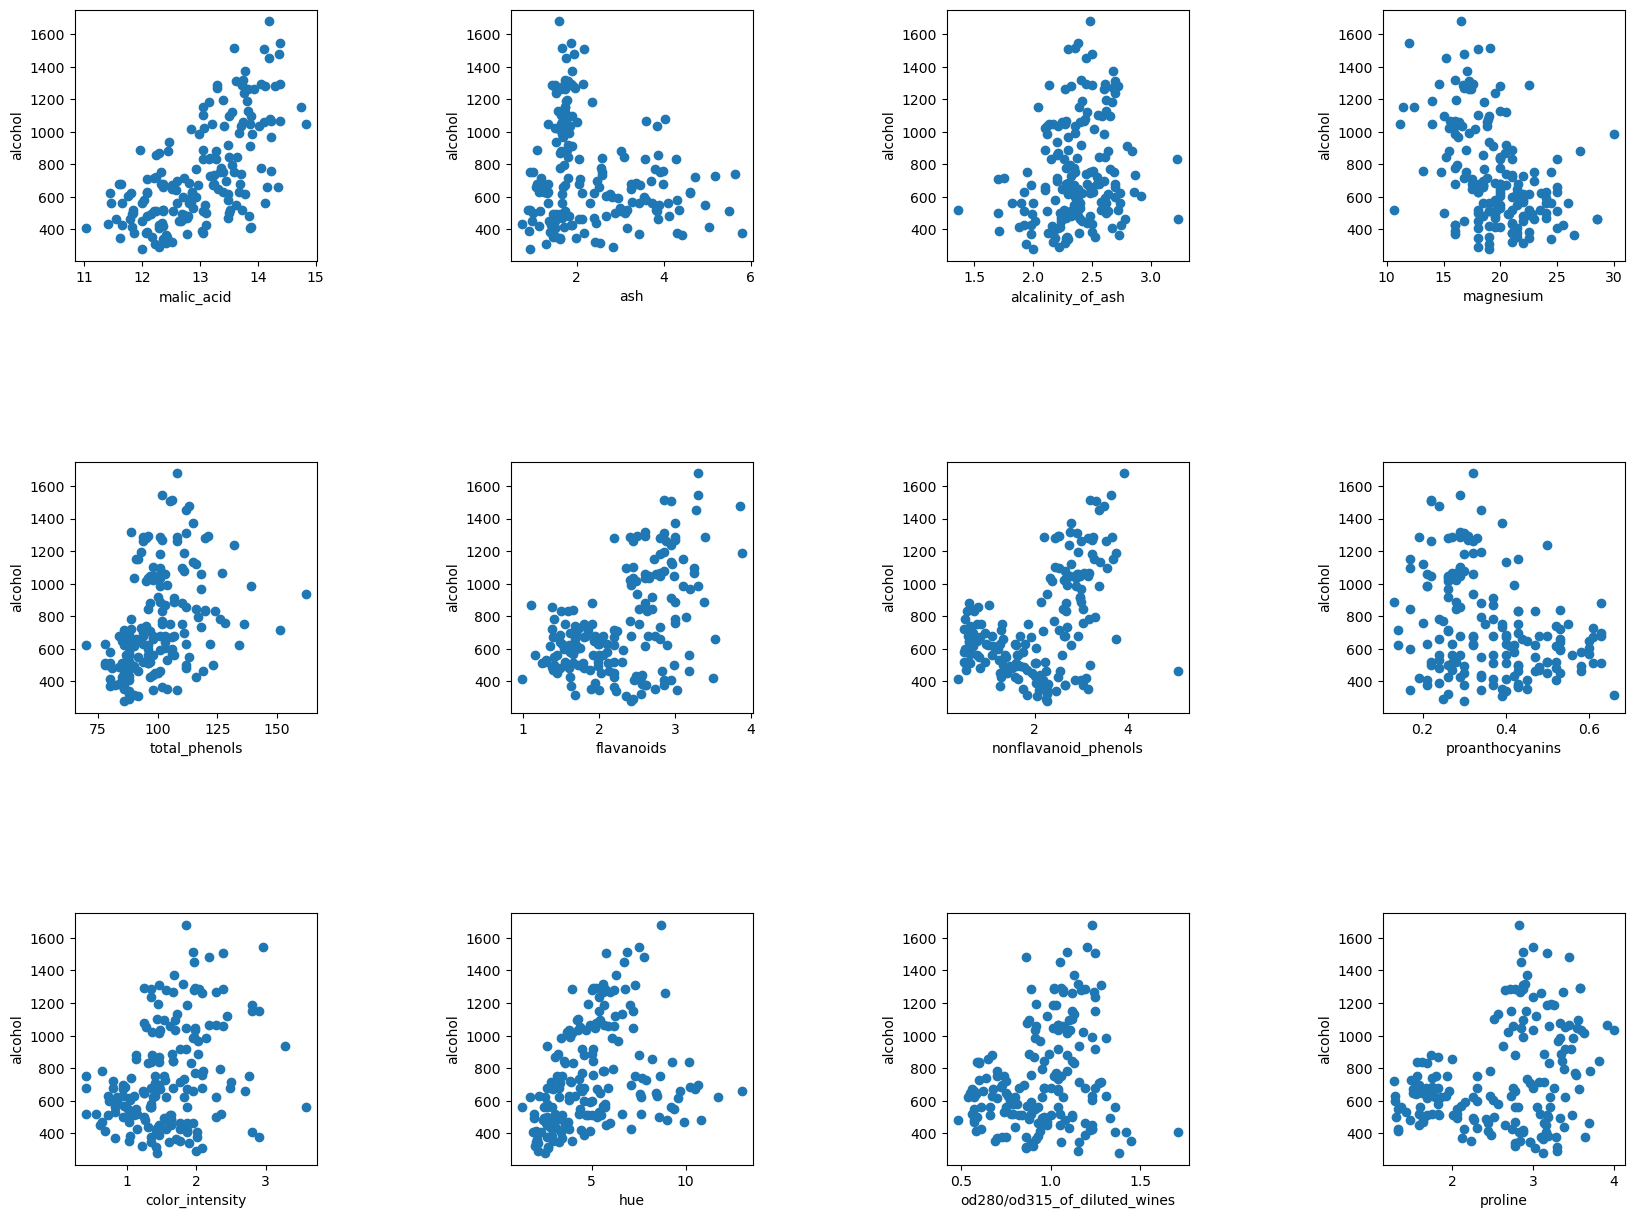

In [5]:
#Q1.2 Cont.
fig = plt.figure(figsize=(20,15))

for n in range(X.shape[1]):
    ax = fig.add_subplot(3,4,n+1)
    plt.subplots_adjust(hspace=0.8, wspace = .8)
    plt.scatter(X[:,n],y)
    ax.set_xlabel(df.columns[n])
    ax.set_ylabel('alcohol')


#Q1.3
I think that due to Malic_Acid having the strongest positive correlation between it's values and the Alcohol values, then it is the most useful scatter plot in showing the what feature directly increases alcohol value. 

I think that the proanthocyanins scatter plot is the least helpful due to the randomness within the plot. There is little to no correlation between the columns, which only shows how not useful it is. 

#Q1.4

In your opinion, what information, the following observations will give regarding the alcohol content (increase or decrease). You can use any method of your choice to make this decision. Make sure to explain your reasoning • Increased value of Color intensity • Reduced value of Proline • Increased Magnesium but reduced Ash value
## opinion on what I wrote Need Proof(correlation Matrix)?
The color intensity did increase with the alcohol content in a positive correlation for the most part. However, based on what I am seeing, the two are independent of one another. For the reduced value in proline, I would argue the correlation is negative if any correlation is there at all. Both seem to be independent of one another based on what I am seeing. Magnesium seems to have a negative correlation. The higher the Magnesium content the lower the alcohol content. The reduced ash value is shown with almost a straigh up and down correlation between it and the alcohol value. I believe that this shows where there is an optimal amount of ash that is acceptable in the wine, and it is not related to the alcohol level.

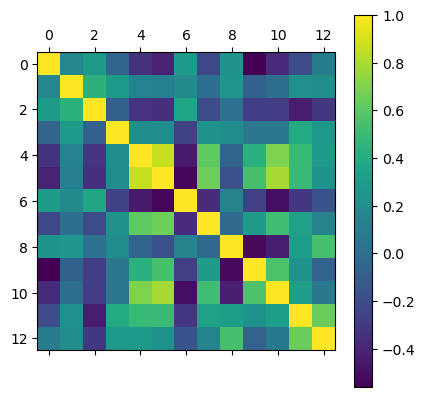

In [85]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

In [7]:
X.shape

(178, 12)

In [86]:
#Q2.1
X = np.array(df['proline']); 
y = np.array(df['alcohol'])
print(X.shape)
print(y.shape)

(178,)
(178,)


In [9]:
#Q2.1 cont. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def poly_power(x,n):
    X = []
    for i in x:
        temp = []
        for j in range(n+1):
            temp.append(i**j)
                
        X.append(temp)
    return np.array(X)

XX = poly_power(X,1)
XX.shape

(178, 2)

In [10]:
#Q2.1 cont. 
beta = np.linalg.inv(XX.T.dot(XX)).dot(XX.T.dot(y))
beta

array([1.17611485e+01, 1.65950018e-03])

In [23]:
#Q2.1 cont. 
xpred = np.linspace(0,1750,100)
Xpred = poly_power(xpred,1)
Xpred.shape
ypred = Xpred.dot(beta)
ypred.shape


(100,)

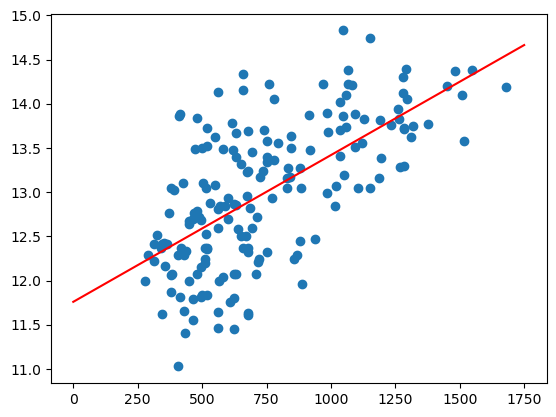

In [24]:
#Q2.1
#create x and y axis labels
plt.scatter(X,y)
plt.plot(xpred,ypred,color = 'r')
plt.show()

In [50]:
yhat = XX.dot(beta)

In [28]:
from sklearn.metrics import r2_score
r2 = (r2_score(y,yhat))
print(r2)
#reference: https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/

0.41437548626472054


In [49]:
#Q2.1 cont.
def r_2(y, yhat):
    top = 0
    bottom = 0
    for i in range(0,178):
        top += ((y[i]-yhat[i])**2)
        bottom += ((y[i]-y.mean())**2)
    R2 = 1 - (top/bottom)
    return R2
R_2 = r_2(y, yhat)
print(R_2)

0.4143754862647203


In [66]:
#Q2.2
XX = poly_power(X,2)

betaL = []
yhatL = []
XXL = []
R_two = []
Xpred = []
Ypred = []

for i in range(0,5):
    XXL.append(poly_power(X, i+1))
    betaL.append(np.linalg.inv(XXL[i].T.dot(XXL[i])).dot(XXL[i].T.dot(y)))
    yhatL.append(XXL[i].dot(betaL[i]))
    R_two.append(r_2(y,yhatL[i]))
    Xpred.append(poly_power(xpred,i+1))
    Ypred.append(Xpred[i].dot(betaL[i]))

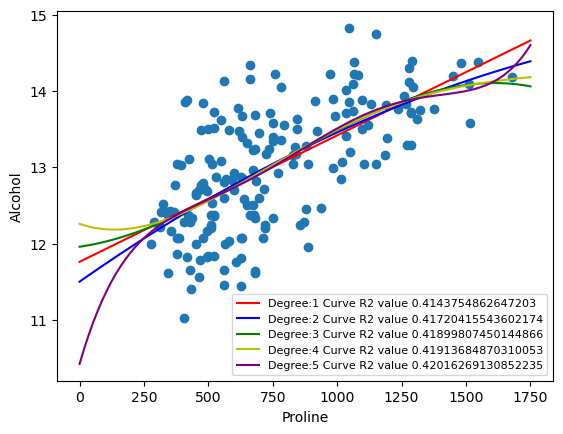

In [94]:
plt.scatter(X,y)
plt.plot(xpred,Ypred[0],color = 'r', label = f'Degree:1 Curve R2 value {R_two[0]}')
plt.plot(xpred,Ypred[1],color = 'b', label = f'Degree:2 Curve R2 value {R_two[1]}')
plt.plot(xpred,Ypred[2],color = 'g', label = f'Degree:3 Curve R2 value {R_two[2]}')
plt.plot(xpred,Ypred[3],color = 'y', label = f'Degree:4 Curve R2 value {R_two[3]}')
plt.plot(xpred,Ypred[4],color = 'purple', label = f'Degree:5 Curve R2 value {R_two[4]}')
plt.rc('legend',fontsize=8) 
plt.legend(loc = 'lower right')
plt.xlabel('Proline')
plt.ylabel('Alcohol')
plt.show()

References: 
Q1
https://www.youtube.com/watch?v=C3CY102ws78
